In [129]:
import pandas_datareader.data as web
from datetime import date
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

Proponemos fechas y descargamos datos

In [6]:
start = date(year = 2018, month = 10, day = 4)
end = date.today()

In [10]:
jpy = web.DataReader('DEXJPUS', 'fred',start,end)
eur = web.DataReader('DEXUSEU', 'fred',start,end)
can = web.DataReader('DEXCAUS', 'fred',start,end)
uk = web.DataReader('DEXUSUK', 'fred',start,end)
aus = web.DataReader('DEXUSAL', 'fred',start,end)
swi = web.DataReader('DEXSZUS', 'fred',start,end)

In [75]:
x = jpy.join([can,uk,aus,swi]).dropna()
y = eur.dropna()

Separamos variables en entrenamiento y prueba para que sea mas certero nuestro modelo

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Se puede ver que las variables tienen una buena correlación con el alto coeficiente de determinación, mayor a 75%
El modelo puede realizar predicciones bastante buenas

In [54]:
x.corr()

,DEXJPUS,DEXCAUS,DEXUSUK,DEXUSAL,DEXSZUS
DEXJPUS,1.000000,0.002746,0.704751,0.798209,0.624111
DEXCAUS,0.002746,1.000000,0.041904,-0.115517,0.345948
DEXUSUK,0.704751,0.041904,1.000000,0.712788,0.598196
DEXUSAL,0.798209,-0.115517,0.712788,1.000000,0.358937
DEXSZUS,0.624111,0.345948,0.598196,0.358937,1.000000


In [79]:
r_sq = model.score(x, eur)

In [80]:
r_sq

0.7668405678127705

In [82]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [112]:
df = y_test.reset_index().join(y_pred)
df = df.set_index(df.iloc[:,0]).drop(["DATE"],axis=1)
df = df.rename({0:"EurPred"},axis=1)

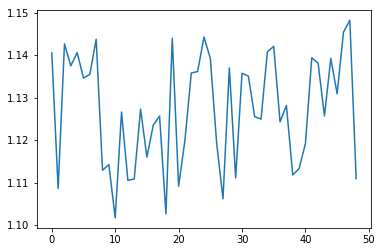

In [126]:
plt.plot(np.arange(len(df.index)),y_pred)

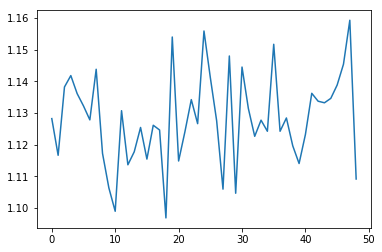

In [127]:
plt.plot(np.arange(len(df.index)),y_test)

Como se puede observar los valores son muy parecidos, las tendencias son casi iguales